Homework 4: Sentiment Analysis - Task 2
----

Names & Sections
----
Names: Julia Geller (4120) and Shae Marks (4120)

Task 2: Train a Naive Bayes Model (30 points)
----

Using `nltk`'s `NaiveBayesClassifier` class, train a Naive Bayes classifier using a Bag of Words as features.
https://www.nltk.org/_modules/nltk/classify/naivebayes.html 

In [1]:
# our utility functions
# RESTART your jupyter notebook kernel if you make changes to this file
import sentiment_utils as sutils

# nltk for Naive Bayes and metrics
import nltk
import nltk.classify.util
from nltk.metrics.scores import (precision, recall, f_measure, accuracy)
from nltk.classify import NaiveBayesClassifier

# some potentially helpful data structures from collections
from collections import defaultdict, Counter

# so that we can make plots
import matplotlib.pyplot as plt
# if you want to use seaborn to make plots
#import seaborn as sns

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shaem\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# define constants for the files we are using
TRAIN_FILE = "movie_reviews_train.txt"
DEV_FILE = "movie_reviews_dev.txt"

In [3]:
# load in your data and make sure you understand the format
# Do not print out too much so as to impede readability of your notebook
train_tups = sutils.generate_tuples_from_file(TRAIN_FILE)
dev_tups = sutils.generate_tuples_from_file(DEV_FILE)

X_train, y_train = train_tups
X_dev, y_dev = dev_tups

print("First part of tuple is an array of tokenized reviews (represented as arrays of tokens)")
print("Second part of tuple is an array of labels for the reviews")
print(X_train[0][:10], y_train[0])

First part of tuple is an array of tokenized reviews (represented as arrays of tokens)
Second part of tuple is an array of labels for the reviews
['Van', 'Dien', 'must', 'cringe', 'with', 'embarrassment', 'at', 'the', 'memory', 'of'] 0


In [4]:
# set up a sentiment classifier using NLTK's NaiveBayesClassifier and 
# a bag of words as features
# take a look at the function in lecture notebook 7 (feel free to copy + paste that function)
# the nltk classifier expects a dictionary of features as input where the key is the feature name
# and the value is the feature value

# need to return a dict to work with the NLTK classifier
# Possible problem for students: evaluate the difference 
# between using binarized features and using counts (non binarized features)


# NOTE: word_feats has been moved to the sutils file - copy and pasting it here for easier grading 

def word_feats(doc_words: list, vocab: list, binary: bool = False, verbose: bool = False) -> dict:   
    """
    Create BoW representations of the given data to be used by NLTK's NaiveBayesClassifier.
    Args:
        doc_words: list of words from a tokenized data sample 
        vocab: a list of words in the vocabulary
        binary: whether or not to use binary features
        verbose: whether or not to print additional information about the data being processed 
    Returns:
        a dictionary representing the words present in both the vocab and doc_words 
        - for binary representations, in the format {word1: True, word2: True, ...}
        - for multinomial representations, in the format {word1: count1, word2: count2, ...}
    """ 
    # STUDENTS IMPLEMENT
    doc_counter = Counter(doc_words)

    # for efficiency, only iterate through words that we know are both in the vocab and in doc_words 
    overlap = set.intersection(set(doc_counter.keys()), set(vocab))

    # initialize empty dictionary of features 
    bow_feats = {}
    for word in overlap:
        if binary:
            bow_feats[word] = True
        else:
            bow_feats[word] = doc_counter[word]

    if verbose:
        print("Size of doc_words data:", len(doc_words))
        print("Size of vocab:", len(vocab))
        print("Size of overlap between doc_words and vocab:", len(overlap))
        print("Feature examples:", list(bow_feats.items())[:3])
        print()
           
    return bow_feats 

In [5]:
# set up & train a sentiment classifier using NLTK's NaiveBayesClassifier and
# classify the first example in the dev set as an example
# make sure your output is well-labeled
# Should take < 10 sec to train (on Felix's computer this takes 0.5 sec)

# test to make sure that you can train the classifier and use it to classify a new example
vocab = sutils.create_index(X_train)

# Training a classifier using binary features and predicting the label of the first dev example 
X_train_feats_binary = sutils.naive_bayes_featurize(X_train, vocab, binary=True)
X_dev_feats_binary = sutils.naive_bayes_featurize(X_dev, vocab, binary=True)

print("Sanity check featurization:", list(X_train_feats_binary[0].items())[:5], "\n")

binary_train_data = [(x, y) for x,y in zip(X_train_feats_binary, y_train)]
binary_classifier = NaiveBayesClassifier.train(binary_train_data)

# classify just the first example in the dev data 
prediction = binary_classifier.classify(X_dev_feats_binary[0])
print("BINARY")
print("Sample Tokenized:", X_dev[0])
print("Sample:", " ".join(X_dev[0]))
print("Predicted Label:", prediction, " True Label:", y_dev[0])

Sanity check featurization: [("'", True), ('this', True), ('getting', True), ('still', True), ('indeed', True)] 

BINARY
Sample Tokenized: ['The', 'movie', "'Gung", 'Ho', '!', "'", ':', 'The', 'Story', 'of', 'Carlson', "'s", 'Makin', 'Island', 'Raiders', 'was', 'made', 'in', '1943', 'with', 'a', 'view', 'to', 'go', 'up', 'the', 'moral', 'of', 'American', 'people', 'at', 'the', 'duration', 'of', 'second', 'world', 'war', '.', 'It', 'shows', 'with', 'the', 'better', 'way', 'that', 'the', 'cinema', 'can', 'constitute', 'body', 'of', 'propaganda', '.', 'The', 'value', 'of', 'this', 'film', 'is', 'only', 'collection', 'and', 'no', 'artistic', '.', 'In', 'a', 'film', 'of', 'propaganda', 'it', 'is', 'useless', 'to', 'judge', 'direction', 'and', 'actors', '.', 'Watch', 'that', 'movie', 'if', 'you', 'are', 'interested', 'to', 'learn', 'how', 'propaganda', 'functions', 'in', 'the', 'movies', 'or', 'if', 'you', 'are', 'a', 'big', 'fun', 'of', 'Robert', 'Mitchum', 'who', 'has', 'a', 'small', 'role

In [6]:
# Training a classifier using multinomial features and predicting the label of the first dev example 
X_train_feats_multi = sutils.naive_bayes_featurize(X_train, vocab, binary=False)
X_dev_feats_multi = sutils.naive_bayes_featurize(X_dev, vocab, binary=False)

print("Sanity check featurization:", list(X_train_feats_multi[0].items())[:5], "\n")

multinomial_train_data = [(x, y) for x,y in zip(X_train_feats_multi, y_train)]
multinomial_classifier = NaiveBayesClassifier.train(multinomial_train_data)

# classify just the first example in the dev data 
prediction = multinomial_classifier.classify(X_dev_feats_multi[0])
print("MULTINOMIAL")
print("Sample Tokenized:", X_dev[0])
print("Sample:", " ".join(X_dev[0]))
print("Predicted Label:", prediction, " True Label:", y_dev[0])

Sanity check featurization: [("'", 4), ('this', 1), ('getting', 1), ('still', 1), ('indeed', 1)] 

MULTINOMIAL
Sample Tokenized: ['The', 'movie', "'Gung", 'Ho', '!', "'", ':', 'The', 'Story', 'of', 'Carlson', "'s", 'Makin', 'Island', 'Raiders', 'was', 'made', 'in', '1943', 'with', 'a', 'view', 'to', 'go', 'up', 'the', 'moral', 'of', 'American', 'people', 'at', 'the', 'duration', 'of', 'second', 'world', 'war', '.', 'It', 'shows', 'with', 'the', 'better', 'way', 'that', 'the', 'cinema', 'can', 'constitute', 'body', 'of', 'propaganda', '.', 'The', 'value', 'of', 'this', 'film', 'is', 'only', 'collection', 'and', 'no', 'artistic', '.', 'In', 'a', 'film', 'of', 'propaganda', 'it', 'is', 'useless', 'to', 'judge', 'direction', 'and', 'actors', '.', 'Watch', 'that', 'movie', 'if', 'you', 'are', 'interested', 'to', 'learn', 'how', 'propaganda', 'functions', 'in', 'the', 'movies', 'or', 'if', 'you', 'are', 'a', 'big', 'fun', 'of', 'Robert', 'Mitchum', 'who', 'has', 'a', 'small', 'role', 'in', '

BINARY
precision: 0.8681318681318682
recall: 0.7523809523809524
f1: 0.8061224489795917
accuracy: 0.81

MULTINOMIAL
precision: 0.8850574712643678
recall: 0.7333333333333333
f1: 0.8020833333333334
accuracy: 0.81



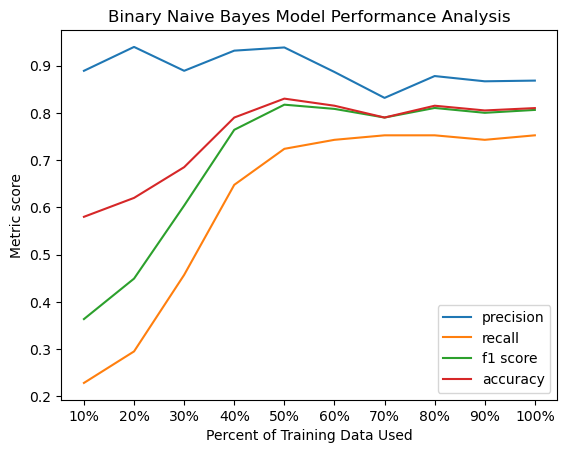

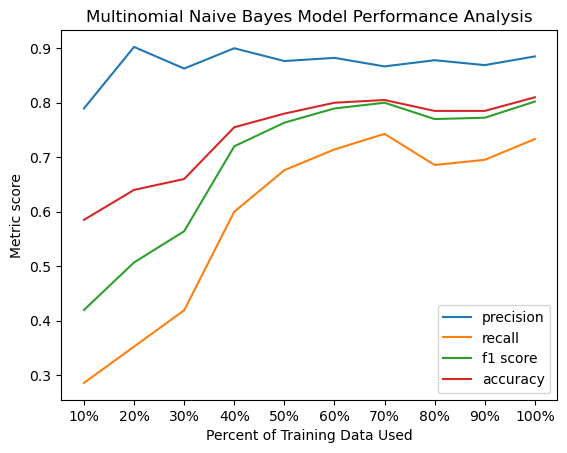

In [7]:
# Using the provided dev set, evaluate your model with precision, recall, and f1 score as well as accuracy
# You may use nltk's implemented `precision`, `recall`, `f_measure`, and `accuracy` functions
# (make sure to look at the documentation for these functions!)
# you will be creating a similar graph for logistic regression and neural nets, so make sure
# you use functions wisely so that you do not have excessive repeated code
# write any helper functions you need in sentiment_utils.py (functions that you'll use in your other notebooks as well)
precision, recall, f1, accuracy = sutils.naive_bayes_metrics(X_train_feats_binary, y_train, X_dev_feats_binary, y_dev)
print("BINARY")
print('precision:', precision)
print('recall:', recall)
print('f1:', f1)
print('accuracy:', accuracy)
print()



precision, recall, f1, accuracy = sutils.naive_bayes_metrics(X_train_feats_multi, y_train, X_dev_feats_multi, y_dev)
print("MULTINOMIAL")
print('precision:', precision)
print('recall:', recall)
print('f1:', f1)
print('accuracy:', accuracy)
print()

# create a graph of your classifier's performance on the dev set as a function of the amount of training data
# the x-axis should be the amount of training data (as a percentage of the total training data)
# the y-axis should be the performance of the classifier on the dev set
# the graph should have 4 lines, one for each of precision, recall, f1, and accuracy
# the graph should have a legend, title, and axis labels

# takes approximately 3.5sec to run on Felix's computer
# graph for Binary Naive Bayes Classifier 
binary_dev_data = [(x, y) for x,y in zip(X_dev_feats_binary, y_dev)]
sutils.create_training_graph(sutils.naive_bayes_metrics, binary_train_data, binary_dev_data, 'Binary Naive Bayes', 'Binary_Naive_Bayes_graph.png')

# graph for Multinomial Naive Bayes Classifier 
multinomial_dev_data = [(x, y) for x,y in zip(X_dev_feats_multi, y_dev)]
sutils.create_training_graph(sutils.naive_bayes_metrics, multinomial_train_data, multinomial_dev_data, 'Multinomial Naive Bayes', 'Multinomial_Naive_Bayes_graph.png')



Test your model using both a __binarized__ and a __multinomial__ BoW. Use whichever one gives you a better final f1 score on the dev set to produce your graphs.

- f1 score binarized: 0.806
- f1 score multinomial: 0.802


The binary model had a slightly better f1 score 

In [8]:
binary_f1 = sutils.naive_bayes_metrics(X_train_feats_binary, y_train, X_dev_feats_binary, y_dev)[2]
print("F1 score for binary model:", binary_f1)

multinomial_f1 = sutils.naive_bayes_metrics(X_train_feats_multi, y_train, X_dev_feats_multi, y_dev)[2]
print("F1 score for multinomial model:", multinomial_f1)

F1 score for binary model: 0.8061224489795917
F1 score for multinomial model: 0.8020833333333334
